In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#2021年4月6日

# 图搜素 

# 图 adjacent matrix


ver_tex_number=10

a_matrix=[]
for i in range(ver_tex_number):
    a_matrix.append([0]*ver_tex_number)

for i in range(ver_tex_number):
    a_matrix[2][i]=1

for i in range(ver_tex_number):
    a_matrix[i][2]=1
    


In [4]:
#图遍历
from collections import deque
def graph_travel(a):
    visited_list=[]
    start=(0,0)
    q=deque()
    q.append(start)
    check=list(range(len(a)))


    while(len(q)>0):
        now=q.popleft()
        i,j=now[0],now[1]+1
        if (i in check and j in check and (i,j) not in visited_list):
            q.append( (i,j))
            visited_list.append((i,j))
        i,j=now[0]+1,now[1]
        if (i in check and j in check and (i,j) not in visited_list):
            q.append( (i,j))
            visited_list.append((i,j))
        i,j=now[0]-1,now[1]
        if (i in check and j in check and (i,j) not in visited_list):
            q.append( (i,j))
            visited_list.append((i,j))
        i,j=now[0],now[1]-1
        if (i in check and j in check and (i,j) not in visited_list):
            q.append( (i,j))
            visited_list.append((i,j))
        

        if a[now[0]][now[1]]:
            print(now,a[now[0]][now[1]])
        

graph_travel(a_matrix)

def graw_scheme(g,solution):
    pass
    




(0, 2) 1
(2, 0) 1
(1, 2) 1
(2, 1) 1
(2, 2) 1
(2, 3) 1
(3, 2) 1
(2, 4) 1
(4, 2) 1
(2, 5) 1
(5, 2) 1
(2, 6) 1
(6, 2) 1
(2, 7) 1
(7, 2) 1
(2, 8) 1
(8, 2) 1
(2, 9) 1
(9, 2) 1


[ 0  1  2  3  4  5  6  7  8  9 10]


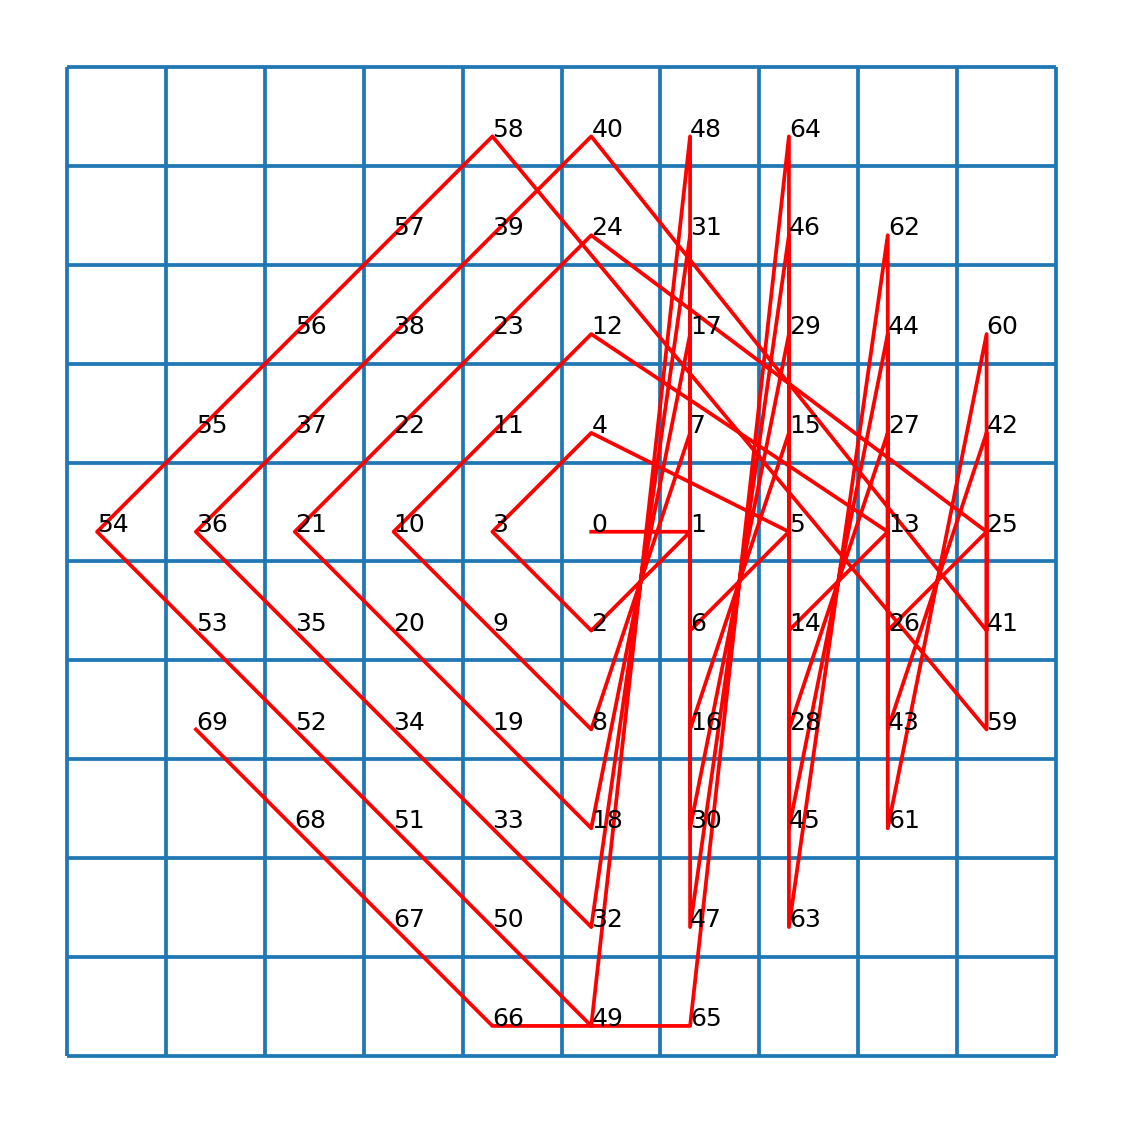

In [14]:
#图搜索 bfs

from collections import deque
def graph_bfs(a):
    visited_list=[]
    start=(5,5,0)
    q=deque()
    q.append(start)
    check=list(range(len(a)))

    res=[]

    dire=[[1,0],[0,-1],[-1,0],[0,1]]

    while(len(q)>0):
        now=q.popleft()
        visited_list.append( (now[0],now[1]) )
        for direction in dire:
            i=now[0]+direction[0]
            j=now[1]+direction[1]
            if (i in check and j in check and ( (i,j) not in visited_list ) and (i,j) not in q):
                q.append( (i,j))

        if(a[now[0]][now[1]]==2):
            res.append([now[0],now[1]])
            break
        res.append([now[0],now[1]])
    
    return res
        
a_matrix[1][3]=2
solution=graph_bfs(a_matrix)

def graw_scheme(g,solution):
    s=np.array(solution)
    plt.gca().set_aspect(1)

    vlines=np.array(list(range(0,11)))
    hlines=np.array(list(range(0,11)))
    print(vlines)
    plt.vlines(vlines,min(vlines),max(vlines))
    plt.hlines(hlines,min(hlines),max(hlines))

    count=0
    for i in solution:
        plt.text(i[0]+0.3,i[1]+0.3,str(count))
        count+=1
    # plt.scatter(s[:,0]+0.5,s[:,1]+0.5)
    
    plt.plot(s[:,0]+0.3,s[:,1]+0.3,color="r")




    plt.axis('off')
    
fig = plt.figure(figsize=(10, 8), dpi=180)

graw_scheme(a_matrix,solution)




[ 0  1  2  3  4  5  6  7  8  9 10]


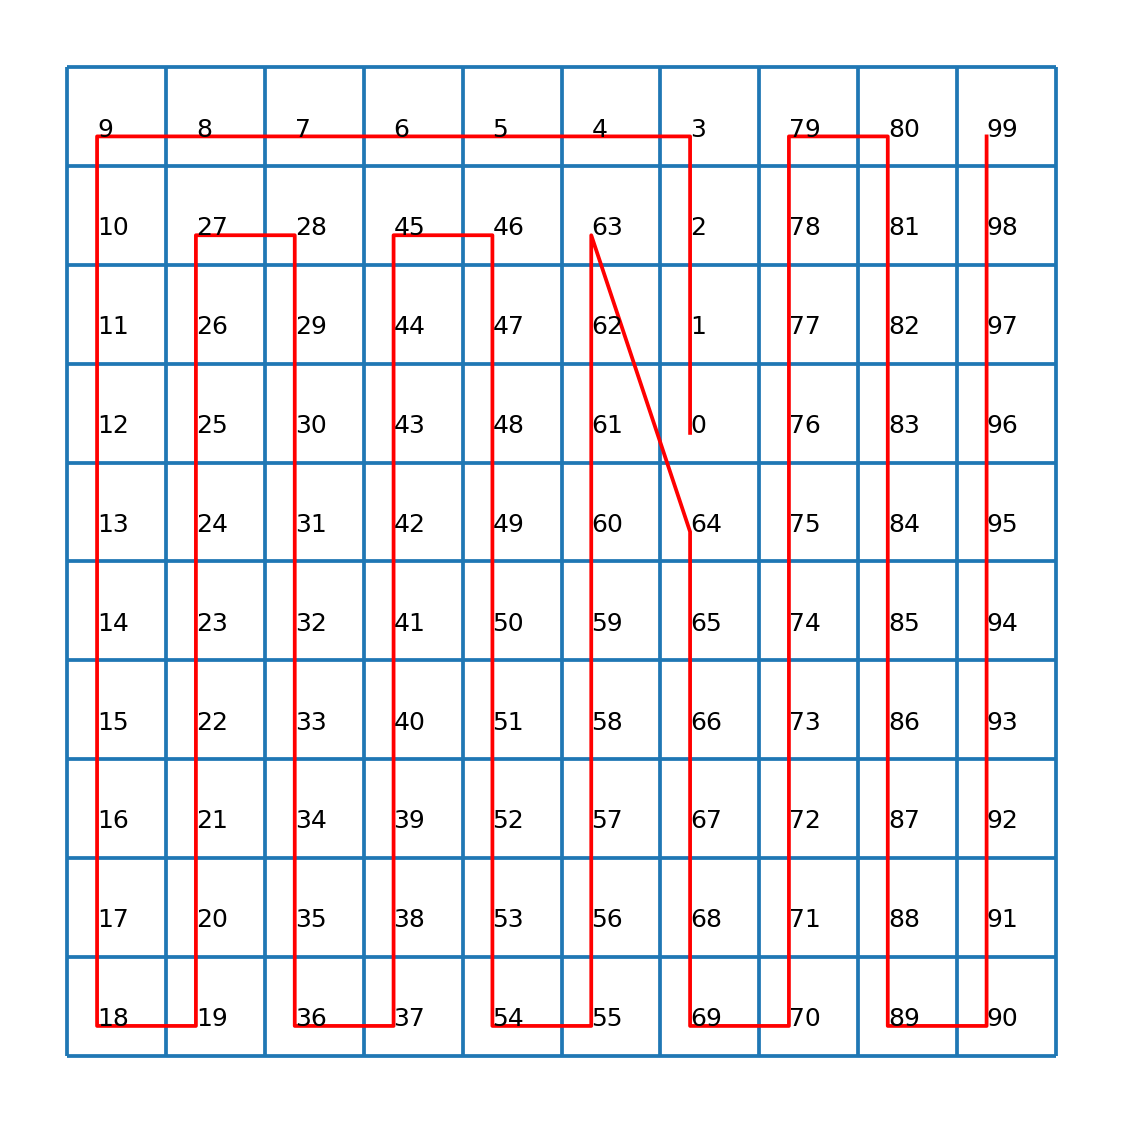

In [13]:
#图搜索 dfs

from collections import deque
def graph_dfs(a):
    visited_list=[]
    start=(6,6)
    # q=deque()
    q=[]
    q.append(start)
    check=list(range(len(a)))

    res=[]

    dire=[[1,0],[0,-1],[-1,0],[0,1]]


    while(len(q)>0):
        now=q.pop(-1)
        res.append( [now[0],now[1]])
        visited_list.append((now[0],now[1]))
        for direction in dire[:]:
            i=now[0]+direction[0]
            j=now[1]+direction[1]
            if (i in check and j in check and ( (i,j) not in visited_list ) ):
                q.append( (i,j))
 

        if a[now[0]][now[1]]==2:
            break

        
    
    return res

fig = plt.figure(figsize=(10, 8), dpi=180)

a_matrix[1][3]=0
a_matrix[9][9]=2
solution=graph_dfs(a_matrix)

    

graw_scheme(a_matrix,solution)


#  实际上这只是棋盘 下面要写一个更完整的图

#   如何提取出路径呢？
#       每个vertex有parent的时候可以提取 对bfs也是如此
#   如何设置障碍呢？
#       格点状态
#   写个A star？
#   2021年4月7日


[0, 7, 1, 2, 3, 9, 4]
{9: 0, 3: 0, 7: 0, 1: 7, 2: 1}
[[2, 1, 7, 0]]
{9: 0, 3: 0, 7: 0, 1: 7, 2: 1}
4
4
4


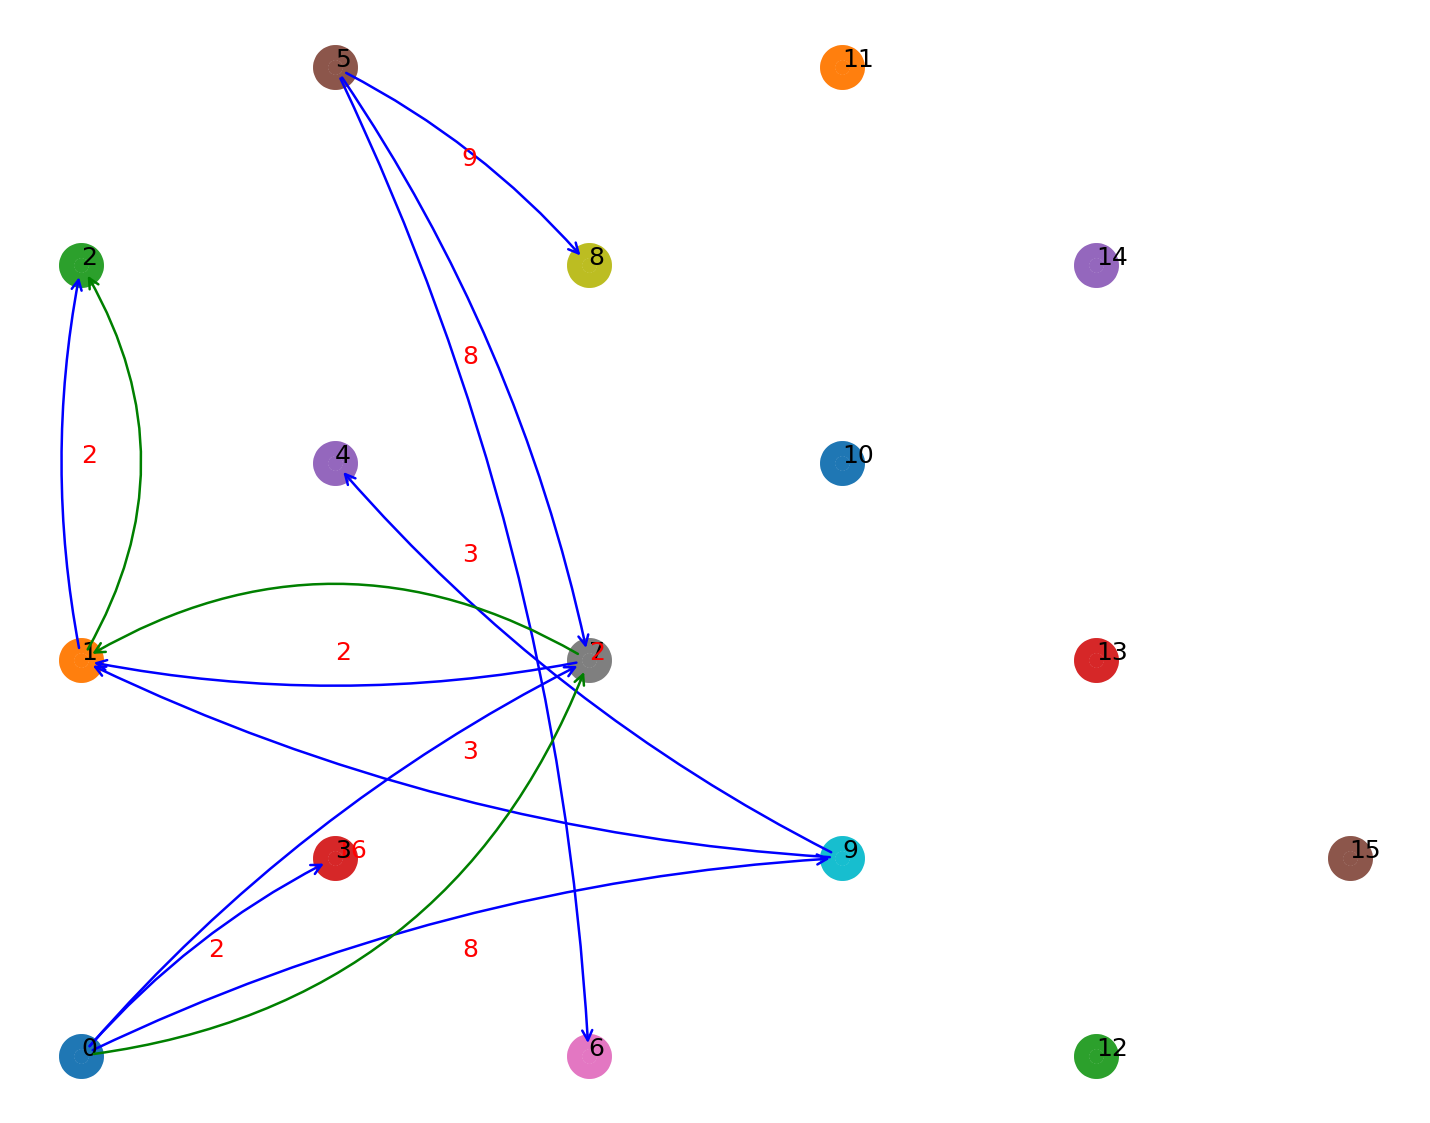

In [7]:
class vertex:

    def __init__(self,id,data=[],state=1,neibor_list=[],parent=-1):
        self.id=id
        self.neibor_list=neibor_list
        self.data=data
        self.state=1
        self.parent=parent

def id2position(id):
    num=3
    i=id//num
    j=id%num
    if(i%2==1):
        j+=0.5
    return i,j

def draw_graph(vertex_list):


    have_draw_edge_list=[]

    for i in vertex_list:
        x,y=id2position(i.id)
       
        for neibor in i.neibor_list:
            x1,y1=id2position(neibor[0])
            # plt.plot([x,x1],[y,y1],color="fancy")

            plt.annotate("",(x1,y1),(x,y),
            ha="right", va="center"
            ,arrowprops=dict(arrowstyle="->",
                                shrinkA=5,
                                shrinkB=5,
                                fc="b", ec="b",
                                connectionstyle="arc3,rad=-0.1"
                                ))
            plt.text(x+(x1-x)*0.5,y+(y1-y)*0.5,str(neibor[1]),color="r")   
        plt.text(x,y,str(i.id))
        plt.scatter(x,y,linewidths=12) 
    plt.axis("off")
    

    return


def draw_path(paths,g):
    

    have_draw_edge_list=[]


    for path in paths:
        if len(path)>2:
            for index in range(len(path)-1):
                print(len(path))
                x,y=id2position(g[path[index]].id)
                x1,y1=id2position(g[path[index+1]].id)
                plt.annotate("",(x,y),(x1,y1),
                ha="right", va="center"
                ,arrowprops=dict(arrowstyle="->",
                                shrinkA=5,
                                shrinkB=5,
                                fc="g", ec="g",
                                connectionstyle="arc3,rad=0.3"
                                ))


    return



# 从一点搜索图
def graph_dfs_from_vertex(vertex,g): 

    res=[]
    s=[]
    visited_id_list=[]
    s.append(vertex)
    while(len(s)>0):
        v=s.pop()
        res.append(v.id)
        visited_id_list.append(v.id)
        for neibor in v.neibor_list:
            if neibor[0] not in visited_id_list:
                s.append(g[neibor[0]])

    return res
    
# 从一点搜索图 寻找某点
def graph_dfs_from_vertex2vertex(vertex,end,g): 

    res=[]
    path=[]
    s=[]
    visited_id_list=[]
    v=vertex
    s.append(v)
    path_dic={}  #son:parent

    def back_infer_path(dic):
        to_be_reveal=[]
        for key in dic:
            pass

        now_id=end.id
        while(now_id!=vertex.id):
            path.append(now_id)
            now_id=path_dic[now_id]
        path.append(now_id)
        res.append(path)

    find=False

    while(len(s)>0):
        v=s.pop()
        visited_id_list.append(v.id)
        if v.id==end.id:
            find=True
            break
        for neibor in v.neibor_list:
            if neibor[0] not in visited_id_list:
                s.append(g[neibor[0]])
                path_dic[neibor[0]]=v.id
    if find:
        print(path_dic)
        back_infer_path(path_dic)
    return res



g=[vertex(i) for i in range(16)]

g[0].neibor_list=[
    (9,8),
    (3,2),
    (7,16)
]

g[5].neibor_list=[
    [6,3],
    [7,8],
    [8,9]
]

g[1].neibor_list=[
    [2,2]
]

g[7].neibor_list=[
    [1,2]
]

g[9].neibor_list=[
    [4,2],
    [1,3]
]

print(graph_dfs_from_vertex(g[0],g))
print(graph_dfs_from_vertex2vertex(g[0],g[2],g))

fig = plt.figure(figsize=(10, 8), dpi=180)

draw_graph(g)
draw_path( graph_dfs_from_vertex2vertex(g[0],g[2],g),g )
# plt.plot([1,2],[1,1]) 


# 也许某条edge是单向的？
# 也许两点 来回距离各异
# 多条路径提取 显然并不适合dfs 因为它只找一条路
# -------------------------------

# 2021年4月8日 考虑写个递归的dfs


In [8]:
# 写个bfs 康康  2021年4月8日
# 提取两点所有路径
# 考虑写个 dijkstra 和 A star 看看
# 如何维护一个优先级队列










In [9]:
# 图4.0
# 只有 vertex的图













In [10]:
m1=np.array([
    [1,1,3],
    [0,1,0],
    [0,0,1]
])

v=np.array([1j,1,2])
v2=np.array([[1],[0],[0]]) #列向量
np.dot(v,v2)
# v2[0,0]
v[1]


(1+0j)

74.97197982929158 2400.2886822816677


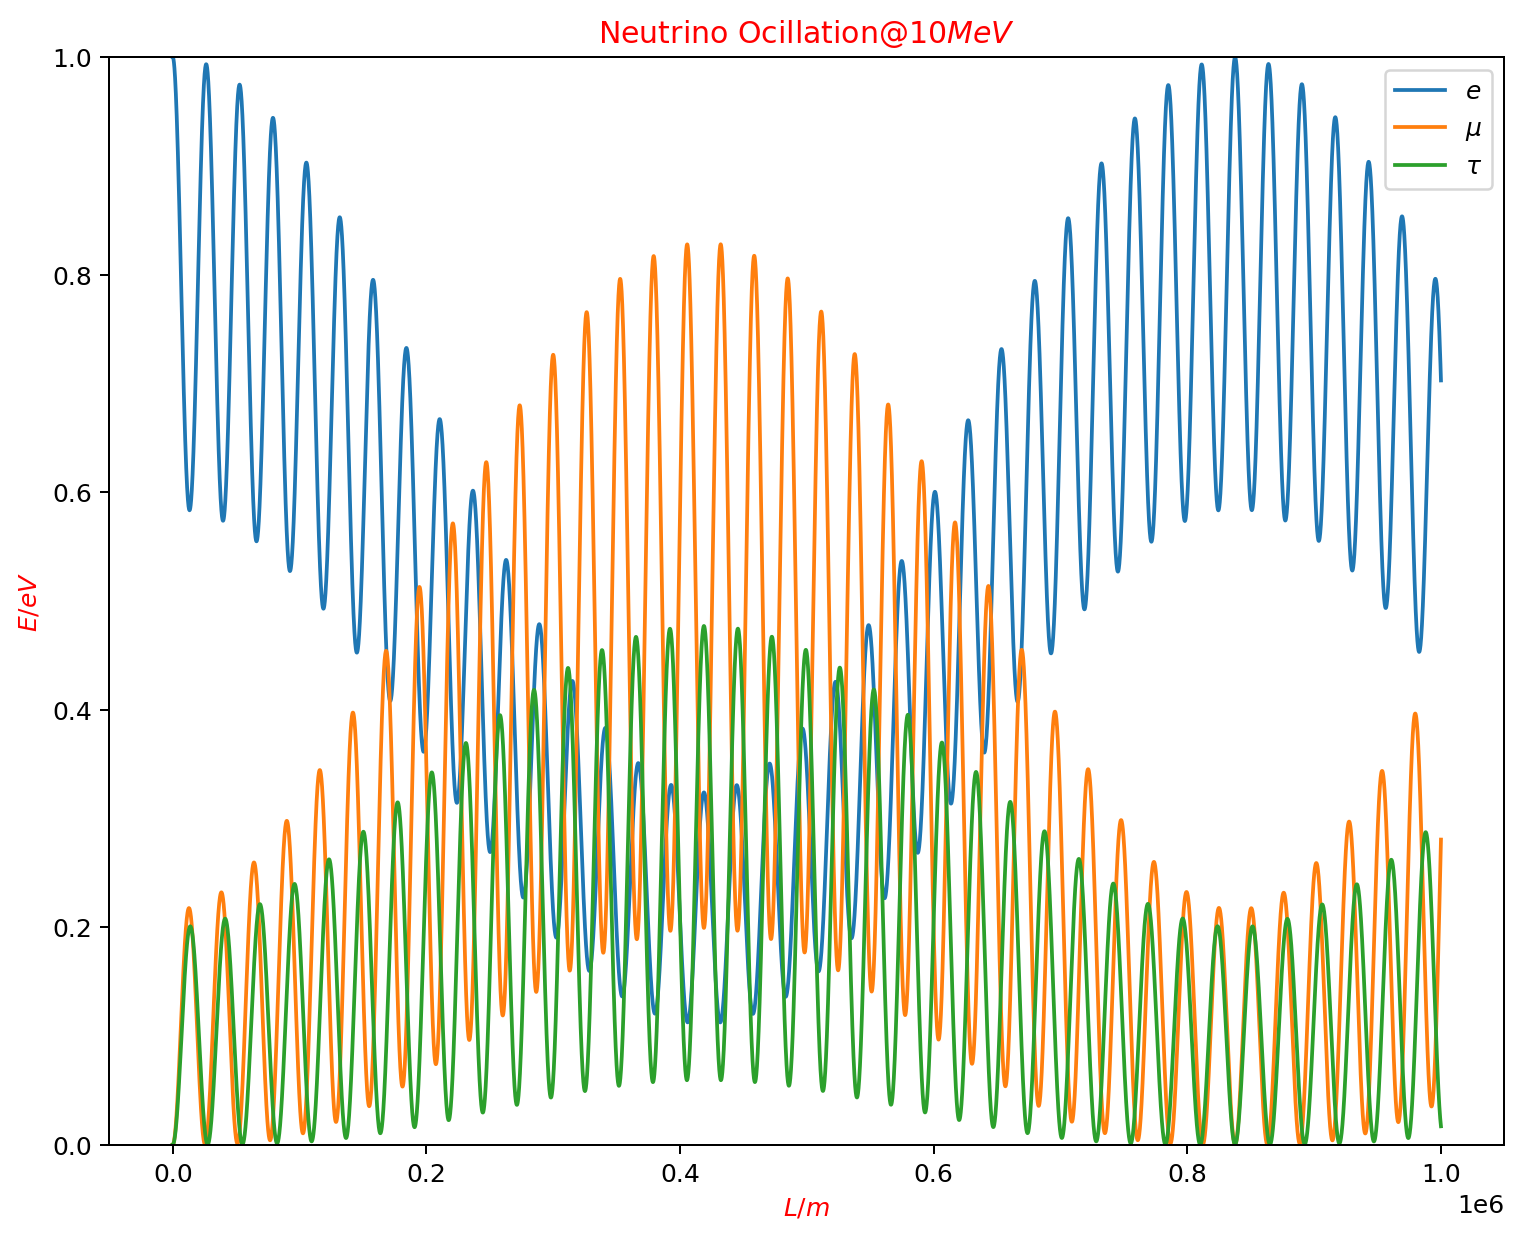

In [11]:
# 中微子振荡作图 2021年4月7日
# 还是得MMA做?

m_square_21=7.59e-5
m_square_23=2.43e-3
#  in eV
t12=np.arcsin(np.sqrt((3.18*0.1)))
t13=np.arcsin(np.sqrt((2.225*0.01)))
t23=np.arcsin(np.sqrt((5.66*0.1)))
asdasd=180/np.pi
# print(t12*asdasd,t23*asdasd,t13*asdasd)
delta=0
c=3e8 # m/s
hbar=6.626e-34/2/np.pi*1.6e19  # eV/s

C2=m_square_21/c/hbar/2
C3=m_square_23/c/hbar/2

print(C2,C3)

def get_prob_i2j(i,j,L,E):
    # L in m E in eV 
    column_v=np.array([[0],[0],[0]])
    column_v[i-1,0]=1

    row_v=np.array([0,0,0])
    row_v[j-1]=1

    U=np.array([
        [1,0,0],
        [0,np.exp(-1j*C2*L/E),0],
        [0,0,np.exp(-1j*C3*L/E)]
    ])
    
    # print(U)

    V1=np.array([
        [1,0,0],
        [0,np.cos(t23),np.sin(t23)],
        [0,-np.sin(t23),np.cos(t23)]
    ])
    
    V2=np.array([
        [np.cos(t13),0,np.sin(t13)*np.exp(-1j*delta)],
        [0,1,0],
        [-np.sin(t13)*np.exp(1j*delta),0,np.cos(t13)]
    ])

    V3=np.array([
        [np.cos(t12),np.sin(t12),0],
        [-np.sin(t12),np.cos(t12),0],
        [0,0,1]
    ])

    V=np.dot(V1,V2)
    V=np.dot(V,V3)
    VD=np.transpose(V)
    VD=np.conjugate(VD)

    res=np.dot( V,column_v )
    res=np.dot(U,res)
    res=np.dot(VD,res)
    res=np.dot(row_v,res)

    return np.abs(res[0])**2


get_prob_i2j(0,0,1e11,1e6)

# L=np.logspace(0,11,100000)
L=np.linspace(0,1e6,10000)
# plt.xscale("log")
fig = plt.figure(figsize=(10, 8), dpi=180)
plt.ylim(0,1)
# plt.plot(L,get_prob_i2j(1,1,L,5e6))
# plt.plot(L,get_prob_i2j(1,1,L,15e6))
plt.plot(L,get_prob_i2j(1,1,L,1e7),label="$e$")

plt.plot(L,get_prob_i2j(1,2,L,1e7),label="$\mu$")
plt.plot(L,get_prob_i2j(1,3,L,1e7),label=r"$\tau$")

plt.title("Neutrino Ocillation@$10MeV$",color="r")
plt.xlabel("$L/m$",color="r")
plt.ylabel("$E/eV$",color="r")
plt.legend()
plt.savefig("Neutrino_Oci.png",dpi=200)




[2.349572301505106e-07, 2.349572301505106e-07, 7.430000000000001e-09, 5.253803384216049e-05, 3.322797014564688e-06, 2.349572301505106e-06, 1.0507606768432097e-07, 0.007430000000000001]


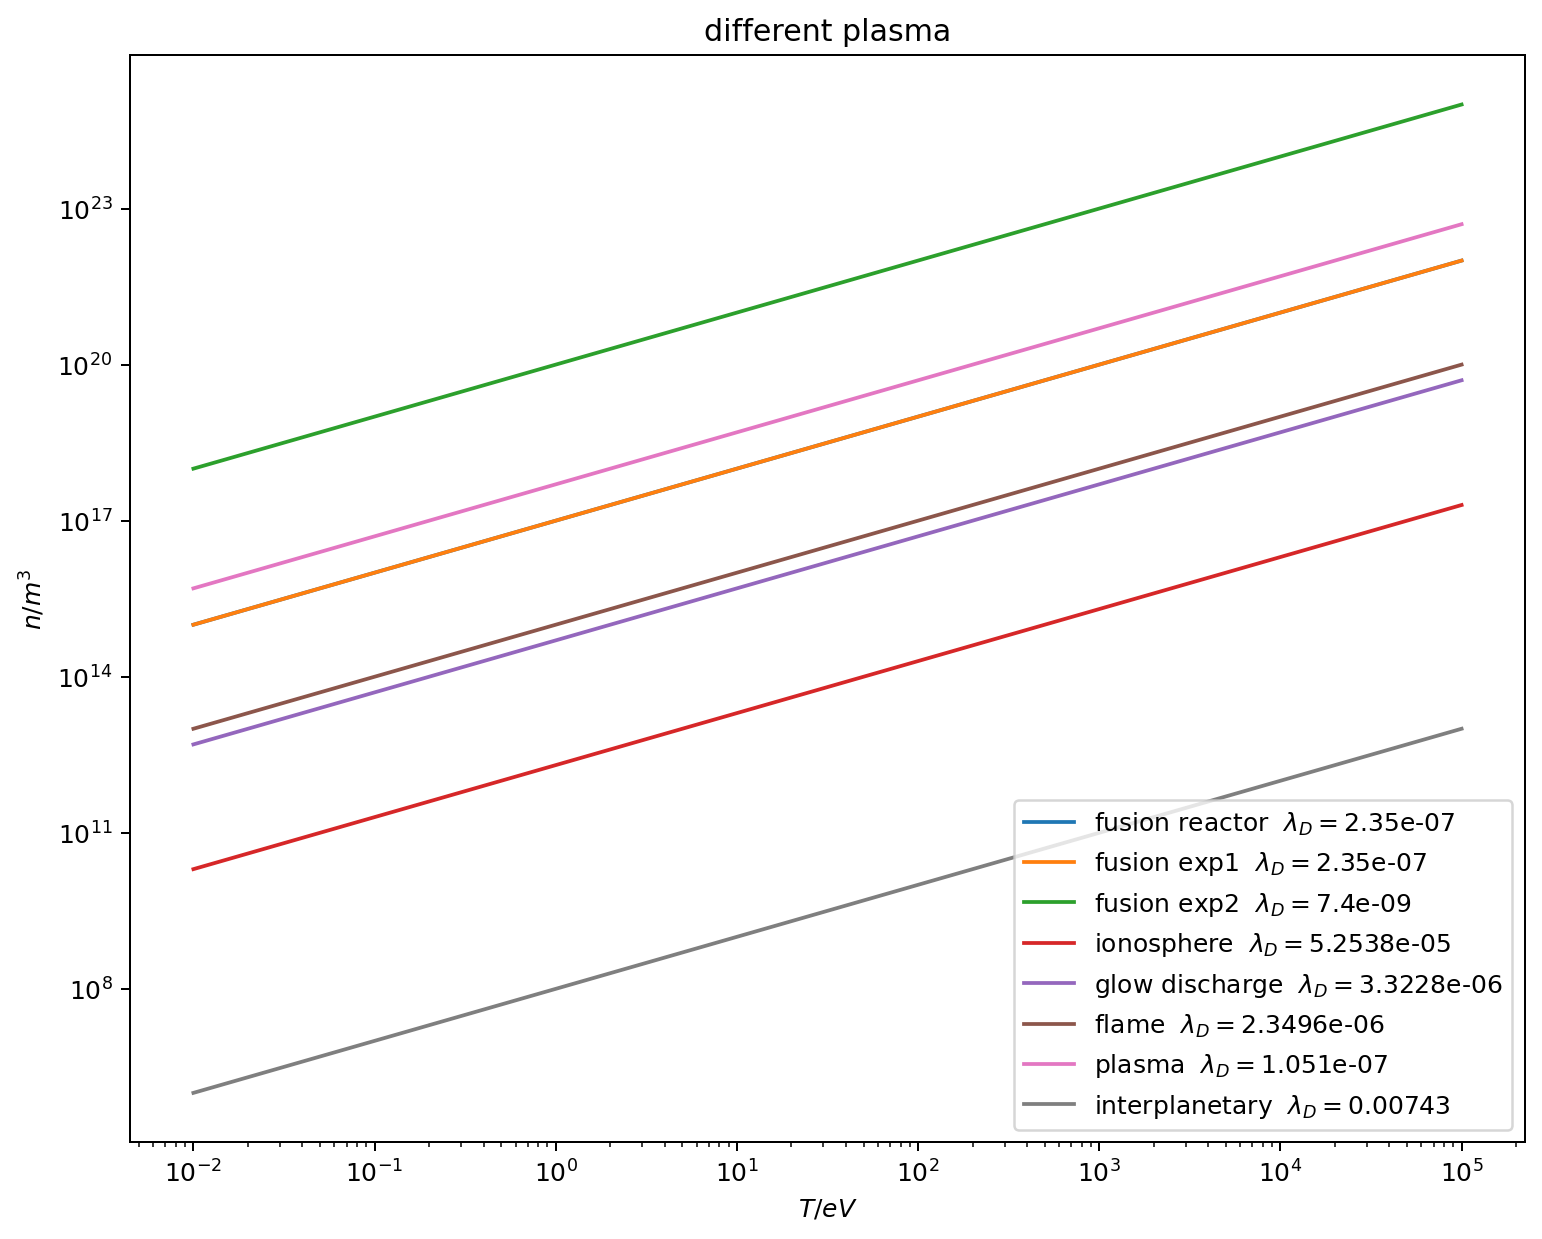

In [12]:
# 德拜长度

def lambda_d(T,n):
    return 7.43e-2*T**0.5*(n*1e-6)**(-0.5)

def get_n(l,T):
    return (l/(7.43e-2*T**0.5))**(-2)*1e6

n=[1e21,1e19,1e23,1e11,1e15,1e14,1e17,1e6]
kt=[1e4,100,1000,0.05,2,0.1,0.2,0.01]
l=[] #cm



for i,j in zip(n,kt):
    l.append(lambda_d(j,i))

print(l)

name=[
    "fusion reactor",
    "fusion exp1",
    "fusion exp2",
    "ionosphere",
    "glow discharge",
    "flame",
    "plasma",
    "interplanetary"
]
fig = plt.figure(figsize=(10, 8), dpi=180)
T=np.linspace(1e-2,1e5,100)
plt.xscale("log")
plt.yscale("log")
for i,n in zip(l,name):
    plt.plot(T,get_n(i,T),label=n+"  $\lambda_D=$"+str(round(i,10)))

plt.title("different plasma")
plt.ylabel("$n/m^3$")
plt.xlabel("$T/eV$")

plt.legend(loc=4)
plt.savefig("typical_plasma.png",dpi=200)


